# **Project: European Soccer Data Analysis in seasons 2008 : 2016**

# **Table of Contents**
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# **Introduction**

> In this project i gathered data from **[kaggle](https://www.kaggle.com/hugomathien/soccer)** and it is mysql data file that has:
>
> +25,000 matches.\
> +10,000 players.\
> 11 European Countries with their lead championship.\
> Seasons 2008 to 2016.\
> Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates.
>
>
> And in this project, I will focus on years [2010 - 2012 - 2015] as they are the most years that have data in the dataset.\
>So, we will discover this data to help us answer some curious questions. personally, I am interested in discovering them.
>
>

> ##### **Questions I will focus on in this analysis:**
>1. What is the league with the most goals all over the 3 years we focus on?
>2. During these three years, how has the level of defense of the teams changed?
>3. What helps teams win? In other words, what distinguishes the best teams?







In [625]:
# importing lybraries used in the project.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
# **Data Wrangling**

In [626]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

con = sqlite3.connect('database.sqlite')
country = pd.read_sql_query('SELECT * FROM Country', con)
league  = pd.read_sql_query('SELECT * FROM League', con)
match   = pd.read_sql_query('SELECT * FROM Match', con)
player  = pd.read_sql_query('SELECT * FROM Player', con)
player_att = pd.read_sql_query('SELECT * FROM Player_Attributes', con)
team = pd.read_sql_query('SELECT * FROM Team', con)
team_att = pd.read_sql_query('SELECT * FROM Team_Attributes', con)


In [627]:
# to display all columns of the DataFrame.
pd.set_option("display.max_columns", None)

## **Data Assessing** :

>#### country dataset :

In [ ]:
print(country.head(), '\n\n')

print('null values: ', country.id.isnull().sum())
print('duplicated data: ', country.id.duplicated().sum())

In [ ]:
# view on the country table
country.info()

In [ ]:
# trying to know what are the unique values: 
if match.id.duplicated().sum() == 0: 
    print('[ id ] column is unique')
else: 
    print('[ id ] column is NOT unique.')

> #### league dataset :


In [ ]:
# exploring league dataset.
print(league.head(), '\n\n')

print('null values: ', league.id.isnull().sum())
print('duplicated data: ', league.id.duplicated().sum())

In [ ]:
# view on league dataset.
league.info()

In [ ]:
# trying to know what are the unique values: 
if  league.id.duplicated().sum() == 0: 
    print('[ id ] column is unique')
else: 
    print('[ id ] column is NOT unique.')

> #### match dataset :
    


In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 6)

# exploring data of the matches to check if there is duplicates, nan values.
print(match.head(), '\n\n')

print('null values: ', match.isnull().sum())
print('duplicated data: ', match.duplicated().sum())

In [ ]:
match.columns

In [ ]:
# trying to know what are the unique values: 
if match.match_api_id.duplicated().sum() == 0: 
    print('[ match_api_id ] column is unique')
else: 
    print('[ match_api_id ] column is NOT unique.')

> #### player dataset :

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 5)

# exploring match dataset.
print(player.head(), '\n\n')

print('null values: ', player.player_api_id.isnull().sum())
print('duplicated data: ', player.player_api_id.duplicated().sum())

In [ ]:
player.info()

In [ ]:
# trying to know what are the unique values: 
if player.player_api_id.duplicated().sum() == 0: 
    print('[ player_api_id ] column is unique')
else: 
    print('[ player_api_id ] column is NOT unique.')

> #### player_attributes dataset : 

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 5)

# exploring data of the matches to check if there is duplicates, nan values.
print(player_att.head(), '\n\n')

print('null values: ', player_att.isnull().sum().sum())
print('duplicated data: ', player_att.duplicated().sum())    

In [ ]:
player_att.info()

> #### team dataset :

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", None)

# exploring data of the matches to check if there is duplicates, nan values.
print(team.head(), '\n\n')

print('null values: ', team.isnull().sum().sum())
print('duplicated data: ', team.duplicated().sum())    

In [ ]:
team.info()

> #### team_attributes dataset :

In [ ]:
# Notice we only showing here some columns as match data set has many columns.
pd.set_option("display.max_columns", 0)

# exploring data of the matches to check if there is duplicates, nan values.
print(team_att.head(), '\n\n')

print('null values: ', team_att.isnull().sum().sum())
print('duplicated data: ', team_att.duplicated().sum())    

In [ ]:
# trying to know what are the unique values: 
if team.team_api_id.duplicated().sum() == 0: 
    print('[ team_api_id ] column is unique')
else: 
    print('[ team_api_id ] column is NOT unique.')

## Conclusion Of Assessing

##### Country dataset conclusion: 
> 11 rows, 2 columns.\
> No null values.  
> No duplicated rows.

> [ **id** ] column is unique ... we can use it in relations between tables.


##### league dataset conclusion: 
> 11 rows, 3 columns.\
> No null values.  
> No duplicated rows.


> [ **id** ] column is unique.

##### match dataset conclusion: 
> 25979 rows, 115 columns.\
> null values => 407395. ---- but all of them in columns we will not use.\
> duplicated rows => 0


>**Need to be cleaned**

> **[match_api_id]** is unique.
    


##### player dataset conclusion: 
> 11060 rows, 7 columns.\
> null values => 0\
> duplicated rows => 0

> **Need to change dtypes**

> [ **player_api_id** ] is unique

##### player_att dataset conclusion: 
> 183978 rows, 42 columns.\
> null values => 47301\
> duplicated rows => 0

> **Need to be cleaned**

> No need for unique values as each player has more than one statistics all over the years.

##### team dataset conclusion: 
> 299 rows, 5 columns.\
> null values => 11 ---- but all of them from one column 'team_fifa_api_id'. 
>
> duplicated rows => 0


> **Need to be cleaned**

> [ **team_api_id** ] is unique

##### team_att dataset conclusion: 
> 1458 rows, 25 columns.\
> null values => 969 --- from one column 'buildUpPlayDribbling' so i prefer to delete it.
>
> duplicated rows => 0


> **Need to be cleaned**

> No need for unique values as each team has more than one statistics all over the years.




## **Data Cleaning**

#### Cleaning 'match' dataset :

In [ ]:
match.info()

In [628]:
# get rid of columns that have null values and we will not use them: 
match = match.loc[:, :'away_team_goal']

In [629]:
# insuring that the data has no null now. 
print('number of null values now: ', match.isnull().sum().sum())

number of null values now:  0


In [630]:
# checking all dtyeps are good or not.
match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25979 entries, 0 to 25978
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                25979 non-null  int64 
 1   country_id        25979 non-null  int64 
 2   league_id         25979 non-null  int64 
 3   season            25979 non-null  object
 4   stage             25979 non-null  int64 
 5   date              25979 non-null  object
 6   match_api_id      25979 non-null  int64 
 7   home_team_api_id  25979 non-null  int64 
 8   away_team_api_id  25979 non-null  int64 
 9   home_team_goal    25979 non-null  int64 
 10  away_team_goal    25979 non-null  int64 
dtypes: int64(9), object(2)
memory usage: 2.2+ MB


In [631]:
# the country_id is the same for the league_id
(match.country_id == match.league_id).all()

True

In [632]:
# so we will drop the country_id
match.drop(columns=['country_id'], inplace=True)

In [633]:
# converting data in the 'date' column from object => datetime.
match['date'] = pd.to_datetime(match['date'])

In [634]:
# making a new column named 'Year' to use it to group data by the year or the season.
match['Year'] = pd.DatetimeIndex(match['date']).year

<AxesSubplot:>

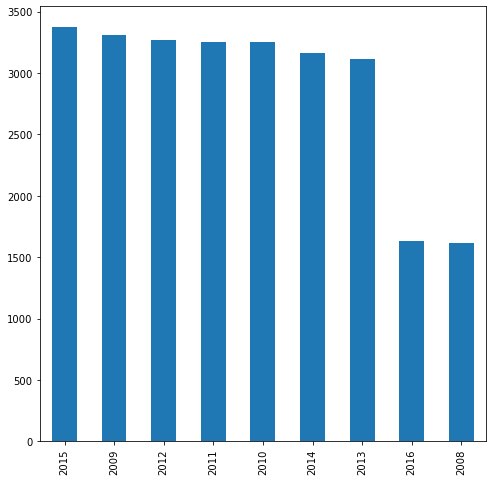

In [635]:
# chosing the most 3 years we have data for.
match.Year.value_counts().plot(kind='bar', figsize=(8, 8))

In [ ]:
# Notice the data should be consistant with all dataframe, if we check the data in [team_att] dataframe
# we will found that there is no data for 2009 teams ... so we will not use 2009 and we use 2010 istead of it

# So our analysis will be only on 2010 - 2012 - 2015.
match = match.query('Year in [2010, 2012, 2015]')

In [ ]:
match.head(2)

#### Cleaning 'player' dataset :

In [636]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [637]:
# we need to change data type of birthday column form object to date time.
player['birthday'] = pd.to_datetime(player['birthday'])
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   id                  11060 non-null  int64         
 1   player_api_id       11060 non-null  int64         
 2   player_name         11060 non-null  object        
 3   player_fifa_api_id  11060 non-null  int64         
 4   birthday            11060 non-null  datetime64[ns]
 5   height              11060 non-null  float64       
 6   weight              11060 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 605.0+ KB


##### Distribution of ages og the players:

In [638]:
# adding a new column named 'Age' to show the distribution of the ages.
player['Age'] = pd.datetime.now().year - pd.DatetimeIndex(player['birthday']).year
player.head()


C:\Users\zmlka\AppData\Local\Temp/ipykernel_3632/2323619251.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  player['Age'] = pd.datetime.now().year - pd.DatetimeIndex(player['birthday']).year


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,Age
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,30
1,2,155782,Aaron Cresswell,189615,1989-12-15,170.18,146,33
2,3,162549,Aaron Doran,186170,1991-05-13,170.18,163,31
3,4,30572,Aaron Galindo,140161,1982-05-08,182.88,198,40
4,5,23780,Aaron Hughes,17725,1979-11-08,182.88,154,43


Text(0, 0.5, 'No of players')

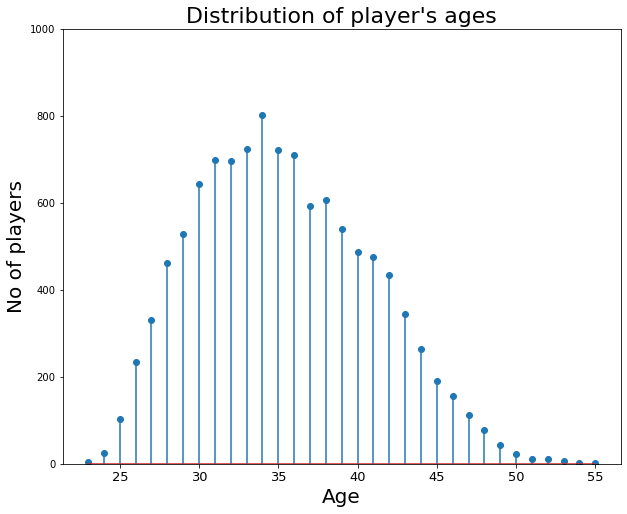

In [639]:
ide = sorted(player.Age.value_counts().index)
Data = player.Age.value_counts()[ide]
plt.subplots(figsize=(10, 8))
plt.stem(Data.index, Data.values, use_line_collection=True)
plt.ylim(0, 1000)
plt.xticks(fontsize=13)
plt.xlabel('Age', fontsize=20)
plt.title("Distribution of player's ages", fontsize= 22)
plt.ylabel('No of players', fontsize=20)


The figure shows that the age curve is a normal distribution curve, so the average age of the players is 35 years.

#### Cleaning 'player_att' dataset :

In [640]:
player_att.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [641]:
# we will drop all players who has null values in their attributes.
player_att.dropna(inplace=True)

In [642]:
# check if there is null values: 
print('number of null values now: ', player_att.isnull().any().sum());

number of null values now:  0


In [643]:
# we need to change data type of [date] column form object to date time.
player_att['date'] = pd.to_datetime(player_att['date'])

# and making a column [Year] of data.
player_att['Year'] = pd.DatetimeIndex(player_att['date']).year
player_att.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180354 entries, 0 to 183977
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   id                   180354 non-null  int64         
 1   player_fifa_api_id   180354 non-null  int64         
 2   player_api_id        180354 non-null  int64         
 3   date                 180354 non-null  datetime64[ns]
 4   overall_rating       180354 non-null  float64       
 5   potential            180354 non-null  float64       
 6   preferred_foot       180354 non-null  object        
 7   attacking_work_rate  180354 non-null  object        
 8   defensive_work_rate  180354 non-null  object        
 9   crossing             180354 non-null  float64       
 10  finishing            180354 non-null  float64       
 11  heading_accuracy     180354 non-null  float64       
 12  short_passing        180354 non-null  float64       
 13  volleys       

In [ ]:
# filtering the data with players of 2010 - 2012 - 2015
player_att = player_att.query('Year in [2010, 2012, 2015]')

#### Cleaning 'team' dataset :

In [644]:
team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                299 non-null    int64  
 1   team_api_id       299 non-null    int64  
 2   team_fifa_api_id  288 non-null    float64
 3   team_long_name    299 non-null    object 
 4   team_short_name   299 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 11.8+ KB


In [645]:
# droping all rows that contain null values (11 value)
team.dropna(inplace=True)

In [646]:
# check if there is null values: 
print('number of null values now: ', team.isnull().any().sum());

number of null values now:  0


#### Cleaning 'team_att' dataset :

In [ ]:
team_att.info()

In [647]:
# i'd like to drop the column itself 'which contains all null values' as i wont use it.
team_att.drop(columns = 'buildUpPlayDribbling', inplace=True)

In [648]:
# cheacking for other null values:
print('Number of null values now: ', team_att.isnull().sum().sum())

Number of null values now:  0


In [ ]:
team_att.info()

In [649]:
# changing the dtype of the column [date] from object to date time.
# and making a column with the name 'Year'.

team_att['date'] = pd.to_datetime(team_att['date'])
team_att['Year'] = pd.DatetimeIndex(team_att['date']).year
team_att.head()

,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,Year
0,1,434,9930,2010-02-22,60,Balanced,Little,50,Mixed,Organised,60,Normal,65,Normal,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover,2010
1,2,434,9930,2014-09-19,52,Balanced,Normal,56,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,2014
2,3,434,9930,2015-09-10,47,Balanced,Normal,54,Mixed,Organised,54,Normal,63,Normal,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover,2015
3,4,77,8485,2010-02-22,70,Fast,Little,70,Long,Organised,70,Risky,70,Lots,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover,2010
4,5,77,8485,2011-02-22,47,Balanced,Little,52,Mixed,Organised,53,Normal,48,Normal,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover,2011


In [ ]:
# filtering by the year to select data only of 2010 - 2012 - 2015
team_att = team_att.query('Year in [2010, 2012, 2015]')

#### Merging 'player' with 'player_att' datasets, to put the players info with his statistics in one dataset 'PlayerData'.

In [650]:
print('Columns of [player] are:', '\n' , list(player.columns), '\n');
print('Columns of [player_att] are:', '\n' , list(player_att.columns), '\n');

Columns of [player] are: 
 ['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday', 'height', 'weight', 'Age'] 

Columns of [player_att] are: 
 ['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes', 'Year'] 



In [651]:
PlayerData = pd.merge(left=player, right=player_att, on=['player_api_id'])
PlayerData.head()

,id_x,player_api_id,player_name,player_fifa_api_id_x,birthday,height,weight,Age,id_y,player_fifa_api_id_y,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Year
0,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,30,1,218353,2016-02-18,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2016
1,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,30,2,218353,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
2,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,30,3,218353,2015-09-21,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,63.0,41.0,45.0,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0,2015
3,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,30,4,218353,2015-03-20,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2015
4,1,505942,Aaron Appindangoye,218353,1992-02-29,182.88,187,30,5,218353,2007-02-22,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,48.0,60.0,64.0,59.0,46.0,65.0,54.0,58.0,54.0,76.0,34.0,62.0,40.0,44.0,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0,2007


In [652]:
# droping not important columns in the new DataFrame.
# driping the player and player_att dataframes, as there is no need for them now.
# del player
# del player_att
try:
    PlayerData.drop(columns=['id_x', 'id_y', 'player_api_id', 'player_fifa_api_id_x', 'player_fifa_api_id_y', 'birthday'], inplace=True)
except:
    print('already these columns were dropped!')
    

#### Merging 'team' with 'team_att' datasets, to put the players info with his statistics in one dataset 'TeamData'.

In [653]:
print('Columns of [team] are:', '\n' , list(team.columns), '\n');
print('Columns of [team_att] are:', '\n' , list(team_att.columns), '\n');

Columns of [team] are: 
 ['id', 'team_api_id', 'team_fifa_api_id', 'team_long_name', 'team_short_name'] 

Columns of [team_att] are: 
 ['id', 'team_fifa_api_id', 'team_api_id', 'date', 'buildUpPlaySpeed', 'buildUpPlaySpeedClass', 'buildUpPlayDribblingClass', 'buildUpPlayPassing', 'buildUpPlayPassingClass', 'buildUpPlayPositioningClass', 'chanceCreationPassing', 'chanceCreationPassingClass', 'chanceCreationCrossing', 'chanceCreationCrossingClass', 'chanceCreationShooting', 'chanceCreationShootingClass', 'chanceCreationPositioningClass', 'defencePressure', 'defencePressureClass', 'defenceAggression', 'defenceAggressionClass', 'defenceTeamWidth', 'defenceTeamWidthClass', 'defenceDefenderLineClass', 'Year'] 



In [654]:
TeamData = pd.merge(left=team, right=team_att, on=['team_api_id'])
TeamData.head()

,id_x,team_api_id,team_fifa_api_id_x,team_long_name,team_short_name,id_y,team_fifa_api_id_y,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,Year
0,1,9987,673.0,KRC Genk,GEN,485,673,2010-02-22,45,Balanced,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,2010
1,1,9987,673.0,KRC Genk,GEN,486,673,2011-02-22,66,Balanced,Little,52,Mixed,Organised,65,Normal,66,Normal,51,Normal,Organised,48,Medium,47,Press,54,Normal,Offside Trap,2011
2,1,9987,673.0,KRC Genk,GEN,487,673,2012-02-22,53,Balanced,Little,55,Mixed,Organised,55,Normal,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover,2012
3,1,9987,673.0,KRC Genk,GEN,488,673,2013-09-20,58,Balanced,Little,38,Mixed,Organised,67,Risky,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover,2013
4,1,9987,673.0,KRC Genk,GEN,489,673,2014-09-19,58,Balanced,Normal,38,Mixed,Organised,67,Risky,48,Normal,56,Normal,Organised,47,Medium,45,Press,55,Normal,Cover,2014


In [655]:
# droping not important columns in the new DataFrame.
try:
    TeamData.drop(columns=['id_x', 'date', 'id_y', 'team_fifa_api_id_x', 'team_fifa_api_id_y'], inplace=True)
except:
    print('already these columns were dropped!')

In [ ]:
TeamData.head()

#### Merging 'leauge' with 'country' datasets, to put the players info with his statistics in one dataset 'LeagueCoun'.

In [656]:
print('Columns of [league] are:', '\n' , list(league.columns), '\n');
print('Columns of [country] are:', '\n' , list(country.columns), '\n');

Columns of [league] are: 
 ['id', 'country_id', 'name'] 

Columns of [country] are: 
 ['id', 'name'] 



In [657]:
LeagueCoun = pd.merge(left=league, right=country, left_on='country_id', right_on='id')
LeagueCoun.head()

,id_x,country_id,name_x,id_y,name_y
0,1,1,Belgium Jupiler League,1,Belgium
1,1729,1729,England Premier League,1729,England
2,4769,4769,France Ligue 1,4769,France
3,7809,7809,Germany 1. Bundesliga,7809,Germany
4,10257,10257,Italy Serie A,10257,Italy


In [658]:
# droping not important columns in the new DataFrame.
# we notice that all country_ids is the same for their league_ids 
try:
    LeagueCoun.drop(columns=['id_y', 'country_id'], inplace=True)
except:
    print('already these columns were dropped!')

In [659]:
# renaming columns 
LeagueCoun.rename(columns={'id_x': 'league_id', 'name_x': 'league_name', 'name_y': 'country_name'}, inplace=True)

In [ ]:
LeagueCoun

#### Merging 'LeagueCount' with 'match' datasets, to put the players info with his statistics in one dataset 'Match_League_Country'.

In [660]:
print('Columns of [LeagueCoun] are:', '\n' , list(LeagueCoun.columns), '\n');
print('Columns of [match] are:', '\n' , list(match.columns), '\n');

Columns of [LeagueCoun] are: 
 ['league_id', 'league_name', 'country_name'] 

Columns of [match] are: 
 ['id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'Year'] 



In [661]:
Match_League_Country = pd.merge(left=match, right=LeagueCoun, on='league_id')
Match_League_Country.head()

,id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Year,league_name,country_name
0,1,1,2008/2009,1,2008-08-17,492473,9987,9993,1,1,2008,Belgium Jupiler League,Belgium
1,2,1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,2008,Belgium Jupiler League,Belgium
2,3,1,2008/2009,1,2008-08-16,492475,9984,8635,0,3,2008,Belgium Jupiler League,Belgium
3,4,1,2008/2009,1,2008-08-17,492476,9991,9998,5,0,2008,Belgium Jupiler League,Belgium
4,5,1,2008/2009,1,2008-08-16,492477,7947,9985,1,3,2008,Belgium Jupiler League,Belgium


In [662]:
# deleting the [LeagueCoun] as we don't need it now after constructing [Match_League_Country]
# del LeagueCoun

# droping not important columns in the new DataFrame.
# we notice that all country_ids is the same for their league_ids 
try:
    Match_League_Country.drop(columns=['id', 'league_id'], inplace=True)
except:
    print('already these columns were dropped!')


In [663]:
# making a new column [Total_goals].
Match_League_Country['Total_goals'] = Match_League_Country.home_team_goal + Match_League_Country.away_team_goal

In [664]:
Match_League_Country.head()

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Year,league_name,country_name,Total_goals
0,2008/2009,1,2008-08-17,492473,9987,9993,1,1,2008,Belgium Jupiler League,Belgium,2
1,2008/2009,1,2008-08-16,492474,10000,9994,0,0,2008,Belgium Jupiler League,Belgium,0
2,2008/2009,1,2008-08-16,492475,9984,8635,0,3,2008,Belgium Jupiler League,Belgium,3
3,2008/2009,1,2008-08-17,492476,9991,9998,5,0,2008,Belgium Jupiler League,Belgium,5
4,2008/2009,1,2008-08-16,492477,7947,9985,1,3,2008,Belgium Jupiler League,Belgium,4


### Our final data tables which we have and will use: 

In [580]:
PlayerData.head(1)

,player_name,height,weight,Age,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Year
0,Aaron Appindangoye,182.88,187,30,2015-11-19,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,49.0,60.0,64.0,59.0,47.0,65.0,55.0,58.0,54.0,76.0,35.0,71.0,70.0,45.0,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0,2015


In [581]:
TeamData.head(1)

,team_api_id,team_long_name,team_short_name,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,buildUpPlayPositioningClass,chanceCreationPassing,chanceCreationPassingClass,chanceCreationCrossing,chanceCreationCrossingClass,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,Year
0,9987,KRC Genk,GEN,45,Balanced,Little,45,Mixed,Organised,50,Normal,35,Normal,60,Normal,Organised,70,High,65,Press,70,Wide,Cover,2010


In [582]:
Match_League_Country.head(1)

,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,away_team_goal,Year,league_name,country_name,Total_goals
0,2009/2010,19,2010-02-03,665626,8635,8342,3,2,2010,Belgium Jupiler League,Belgium,5


<a id='eda'></a>
# **Exploratory Data Analysis**

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.



### 1) What are leagues with the most goals all over [2010 - 2012 - 2015] ?

([<matplotlib.axis.XTick at 0x14065d7b1f0>,
 [Text(3, 0, '2010'), Text(22, 0, '2012'), Text(41, 0, '2015')])

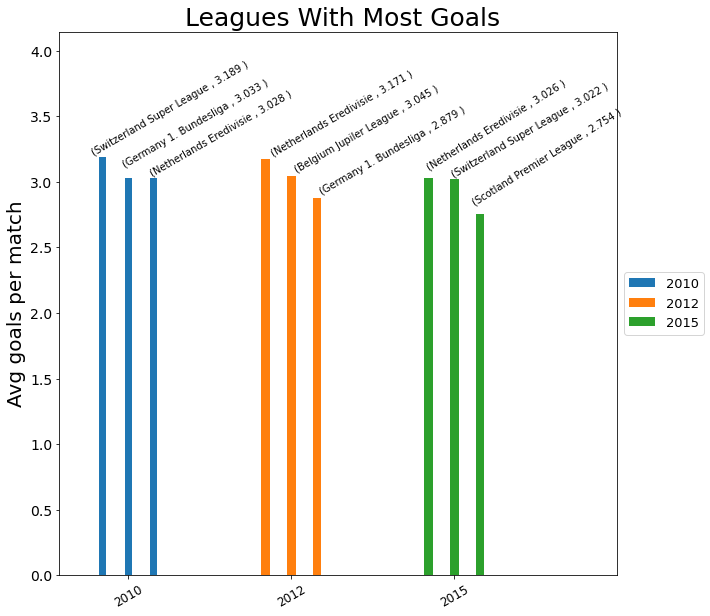

In [684]:

Match_League_Country.head()
goal_10= Match_League_Country.query('Year == 2010')
pro10 = goal_10.groupby(['league_name']).mean()['Total_goals'].nlargest(3)

goal_12 = Match_League_Country.query('Year == 2012')
pro12 = goal_12.groupby(['league_name']).mean()['Total_goals'].nlargest(3)

goal_15 = Match_League_Country.query('Year == 2015')
pro15 = goal_15.groupby(['league_name']).mean()['Total_goals'].nlargest(3)




ind = np.arange(0, 9, 3)
f, axs = plt.subplots(1, 1,figsize=(10,10))
axs.margins(0.3)
axs.set_ylabel('Avg goals per match', fontsize=20)
plt.title(' Leagues With Most Goals', fontsize=25)
plt.yticks(fontsize=14)
plt.xlim(-5, 60)


P10 = plt.bar(ind ,pro10.values,  width=0.8, align='center')


P12 = plt.bar(ind + 19, pro12.values,  width=1, align='center')


P15 = plt.bar(ind + 38, pro15.values,  width=1, align='center')

# to type above the bars
for i in range(3):
    if i == 1:
        plt.text(i * 3 + 8, pro10.values[i]+0.06, '(' + pro10.index[i]+ ' , ' +str(round(pro10.values[i], 3)) + ' ) ', ha='center', va='bottom', rotation='30')
    else:
        plt.text(i * 3 + 8, pro10.values[i], '(' + pro10.index[i] + ' , ' +str(round(pro10.values[i], 3)) + ' ) ', ha='center', va='bottom', rotation='30')
        
        
for i in range(3):
    plt.text(i * 3 + 28, pro12.values[i]+.01 , '(' + pro12.index[i] + ' , ' + str(round(pro12.values[i], 3)) + ' ) ' , ha='center', va='bottom', rotation='30')


for i in range(3):
    if i == 1:
        plt.text(i * 3 + 47, pro15.values[i], '(' +  pro15.index[i]+ ' , ' +str(round(pro15.values[i], 3)) + ' ) ' , ha='center', va='bottom', rotation='30')
    else:
        plt.text(i * 3 + 46, pro15.values[i] + 0.05, '(' +  pro15.index[i]+ ' , ' +str(round(pro15.values[i], 3)) + ' ) ' , ha='center', va='bottom', rotation='32')
plt.legend(['2010','2012','2015'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, prop={'size': 13})
plt.xticks([3, 22, 41], [2010, 2012, 2015], rotation=390, fontsize=12)


### 2) During [2010 - 2012 - 2015] , how has the level of defense of the teams changed?

C:\Users\zmlka\anaconda3\envs\Udacity\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


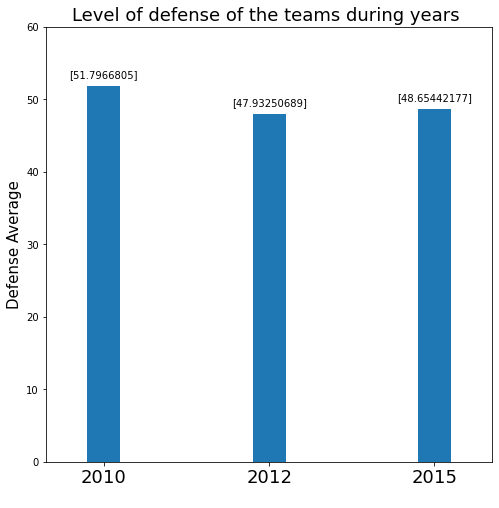

In [692]:
Defence_data = TeamData.query('Year in [2010, 2012, 2015]').groupby('Year').mean()[['defencePressure', 'defenceAggression', 'defenceTeamWidth']]
Defence_data['total defense avg'] = (Defence_data['defencePressure'] + Defence_data['defenceAggression'] + Defence_data['defenceTeamWidth']) / 3
Defence_data.drop(columns=['defencePressure', 'defenceAggression', 'defenceTeamWidth'], inplace=True)

Defence_data.plot.bar(figsize=(8, 8), width=0.2)

axs.bar(Defence_data.index, Defence_data.values[0])
plt.ylabel("Defense Average", fontsize=15)
plt.xlabel(' ')
plt.xticks(fontsize=18, rotation='360')
plt.title('Level of defense of the teams during years ', fontsize=18)
plt.ylim(0, 60)
for i in range(3):
    plt.text(i , Defence_data.values[i]+.9 , Defence_data.values[i] , ha='center', va='bottom', fontsize = 10 )
    
plt.legend(' ').remove()


During 2010, the teams paid attention to defense in a very big way, so the quality of defense yachts was high, reaching 51.796680.\
Then the interest decreased in 2012, and the quality of defense decreased with it until it increased again in 2015.

### 3) What helps teams to win? In other words, what distinguishes the best teams in [2010 - 2012 - 2015]?

In [704]:
v = []

temp = list(Match_League_Country.query('Year in [2010, 2012, 2015]').query('home_team_goal > away_team_goal')['home_team_api_id'].values)  # get winners in home matches.

temp2 = list((Match_League_Country.query('Year in [2010, 2012, 2015]').query('home_team_goal < away_team_goal')['away_team_api_id']))      # get winners in away matches.

for i in temp:
    v.append(i)

for i in temp2:
    v.append(i)
    
# building a dictionary of thease teams ids and their count of vectories:
vectory = {}
for team in v:
    vectory[team] = vectory.get(team, 0) + 1
    
Vec = pd.DataFrame({'wins': vectory})

Best_10 = Vec['wins'].nlargest(10)
Best_10_Data = TeamData.query('Year in [2010, 2012, 2015]')[TeamData['team_api_id'].isin(Best_10.index)]

C:\Users\zmlka\AppData\Local\Temp/ipykernel_3632/3390166196.py:21: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  Best_10_Data = TeamData.query('Year in [2010, 2012, 2015]')[TeamData['team_api_id'].isin(Best_10.index)]


In [705]:
Best_10_Data.mean()[['chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression']]

C:\Users\zmlka\AppData\Local\Temp/ipykernel_3632/700126278.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  Best_10_Data.mean()[['chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression']]


chanceCreationPassing     53.233333
chanceCreationCrossing    55.166667
chanceCreationShooting    56.800000
defencePressure           52.833333
defenceAggression         49.166667
dtype: float64

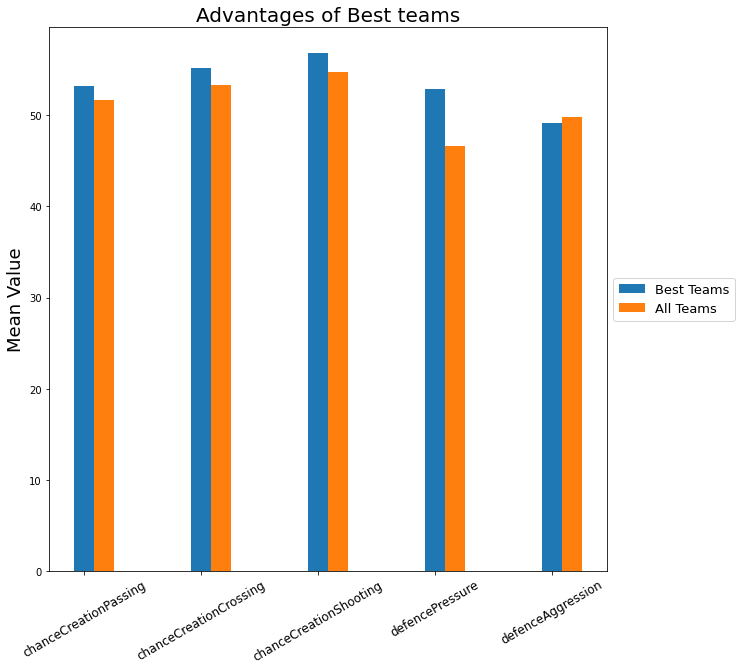

In [706]:
att = ['chanceCreationPassing', 'chanceCreationCrossing', 'chanceCreationShooting', 'defencePressure', 'defenceAggression']

best_teams = Best_10_Data[att].mean()
all_teams = TeamData.query('Year in [2010, 2012, 2015]')[att].mean()
ide = np.arange(0, 35, 7)

plt.rcParams["figure.figsize"] = (10,10)
plt.bar(ide, best_teams, width=1.2)
plt.bar(ide+1.2, all_teams, width=1.2)
plt.xticks(ide, att, rotation=390, fontsize=12)
plt.ylabel('Mean Value', fontsize=18)
plt.title('Advantages of Best teams', fontsize=20)
plt.legend(['Best Teams', 'All Teams'], loc='center left', bbox_to_anchor=(1, 0.5), fontsize=13, prop={'size': 13})


> We notice that good tams give more attention to:
> 1. Creation of passing.
> 2. Creation of crossing.
> 3. Shotting.
> 4. Having a good defence pressure.


### 4) Who are the best players of each year?

Text(0.5, 1.0, 'Best players in each year')

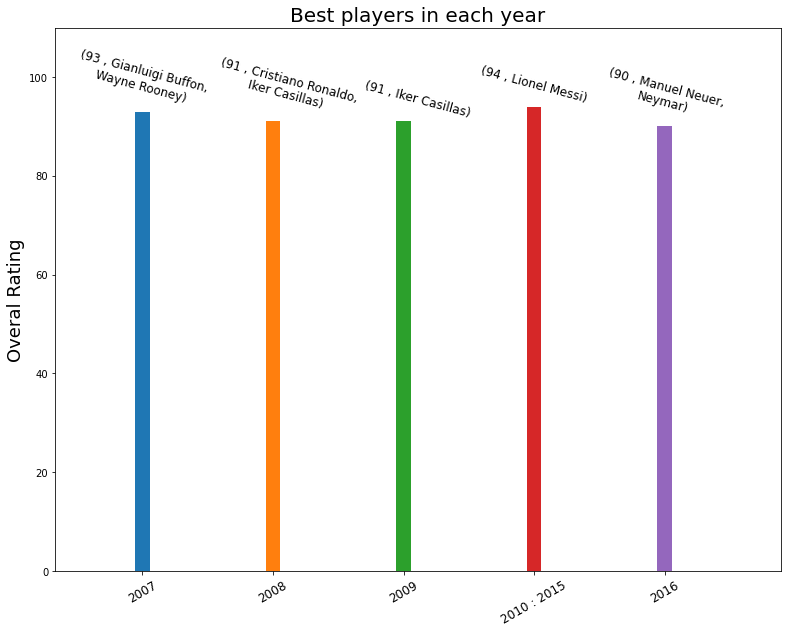

In [1001]:
Hello = PlayerData.groupby('Year')['overall_rating'].max()
df = []

for i in range(len(Hello)):
    df.append(PlayerData.query(f'Year == {Hello.index[i]} and overall_rating == {Hello.values[i]}'))

plt.rcParams["figure.figsize"] = (13,10)

plt.bar([3], df[0].overall_rating, width=0.5)
plt.bar([7.5], df[1].overall_rating, width=0.5)
plt.bar([12], df[2].overall_rating, width=0.5)
plt.bar([16.5], df[4].overall_rating, width=0.5)
plt.bar([21], df[9].overall_rating, width=0.5)


plt.text(3 , df[0].overall_rating.iloc[0] + 0.5, '(' + str(int(df[0].overall_rating.iloc[0]))+ ' , ' + df[0].player_name.iloc[0] + ',' + '\n' + df[0].player_name.iloc[1] + ')' , ha='center', va='bottom', fontsize = 12, rotation='-15' )
plt.text(8, df[1].overall_rating.iloc[0] + 0.5, '(' + str(int(df[1].overall_rating.iloc[0]))+ ' , ' + df[1].player_name.iloc[0] + ',' +'\n' + df[1].player_name.iloc[1] + ')', ha='center', va='bottom', fontsize = 12, rotation='-15' )
plt.text(12.5 , df[2].overall_rating.iloc[0] + 0.5, '(' + str(int(df[2].overall_rating.iloc[0]))+ ' , ' + df[2].player_name.iloc[0] + ')', ha='center', va='bottom', fontsize = 12, rotation='-15' )
plt.text(16.5, df[4].overall_rating.iloc[0] + 0.5, '(' + str(int(df[4].overall_rating.iloc[0]))+ ' , ' + df[4].player_name.iloc[0] + ')', ha='center', va='bottom', fontsize = 12, rotation='-15' )
plt.text(21, df[9].overall_rating.iloc[0] + 0.5, '(' + str(int(df[9].overall_rating.iloc[0]))+ ' , ' + df[9].player_name.iloc[0] + ',' + '\n' + df[9].player_name.iloc[3] + ')', ha='center', va='bottom', fontsize = 12, rotation='-15' )

plt.xlim(0, 25)
plt.ylim(0, 110)
plt.xticks([3, 7.5, 12, 16.5, 21], ['2007', '2008', '2009', '2010 : 2015', '2016'], rotation=390, fontsize=12)
plt.ylabel('Overal Rating', fontsize=18)
plt.title('Best players in each year', fontsize=20)


We noticed that Lionel Messi is the most player that has maximum overal rank all over the years .. as he has the maximum\
    rank in 2010 - 2011 - 2012 - 2013 - 2014 - 2015

<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work, you should save a copy of the report in HTML or PDF form via the **File** > **Download as** submenu. Before exporting your report, check over it to make sure that the flow of the report is complete. You should probably remove all of the "Tip" quotes like this one so that the presentation is as tidy as possible. Congratulations!

,player_name,height,weight,Age,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes,Year
32635,Cristiano Ronaldo,185.42,176,37,2015-10-16,93.0,93.0,right,high,low,82.0,95.0,86.0,81.0,87.0,93.0,88.0,77.0,72.0,91.0,91.0,93.0,90.0,92.0,62.0,94.0,94.0,90.0,79.0,93.0,62.0,29.0,93.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2015
32636,Cristiano Ronaldo,185.42,176,37,2015-09-25,93.0,93.0,right,high,low,82.0,95.0,86.0,81.0,87.0,93.0,88.0,77.0,72.0,91.0,91.0,93.0,90.0,92.0,62.0,94.0,94.0,87.0,79.0,93.0,62.0,29.0,93.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2015
32637,Cristiano Ronaldo,185.42,176,37,2015-09-21,93.0,93.0,right,high,low,82.0,95.0,86.0,81.0,87.0,93.0,88.0,77.0,72.0,91.0,91.0,93.0,90.0,92.0,62.0,94.0,94.0,87.0,79.0,93.0,62.0,29.0,93.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2015
32638,Cristiano Ronaldo,185.42,176,37,2015-05-15,92.0,92.0,right,high,low,83.0,95.0,86.0,82.0,87.0,93.0,88.0,79.0,72.0,92.0,91.0,94.0,93.0,90.0,63.0,94.0,94.0,89.0,79.0,93.0,63.0,24.0,91.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2015
32639,Cristiano Ronaldo,185.42,176,37,2015-04-17,92.0,92.0,right,high,low,83.0,95.0,86.0,82.0,87.0,93.0,88.0,79.0,72.0,92.0,91.0,94.0,93.0,90.0,63.0,94.0,94.0,89.0,79.0,93.0,63.0,24.0,91.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2015
32640,Cristiano Ronaldo,185.42,176,37,2014-10-31,92.0,92.0,right,high,low,83.0,95.0,86.0,82.0,87.0,93.0,88.0,79.0,72.0,92.0,91.0,94.0,93.0,90.0,63.0,94.0,94.0,89.0,79.0,93.0,63.0,24.0,91.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2014
32641,Cristiano Ronaldo,185.42,176,37,2014-09-18,92.0,92.0,right,high,low,83.0,95.0,86.0,82.0,87.0,93.0,88.0,79.0,72.0,92.0,91.0,94.0,93.0,90.0,63.0,94.0,94.0,89.0,79.0,93.0,63.0,24.0,91.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2014
32642,Cristiano Ronaldo,185.42,176,37,2014-02-07,92.0,92.0,right,high,low,83.0,92.0,86.0,82.0,85.0,90.0,88.0,79.0,72.0,95.0,91.0,94.0,93.0,90.0,75.0,94.0,94.0,89.0,79.0,93.0,63.0,24.0,89.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2014
32643,Cristiano Ronaldo,185.42,176,37,2014-01-17,92.0,95.0,right,high,low,83.0,92.0,86.0,82.0,85.0,90.0,88.0,79.0,72.0,95.0,91.0,94.0,93.0,90.0,75.0,94.0,94.0,89.0,79.0,93.0,63.0,24.0,89.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2014
32644,Cristiano Ronaldo,185.42,176,37,2013-09-20,92.0,95.0,right,high,low,83.0,92.0,86.0,82.0,85.0,90.0,88.0,79.0,72.0,95.0,91.0,94.0,93.0,90.0,75.0,94.0,94.0,89.0,79.0,93.0,63.0,24.0,89.0,81.0,85.0,22.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,2013
